# Data 620: Project 1
### Aaron Grzasko
### 9/30/2018

## Identify Dataset

In this assignment, I use a network graph to explore relationships between various characters in the Star Wars movie series.  

Nodes in the graph refer to unique Star Wars characters.  *Note: I assume Anakin Skywalker and Darth Varder are separate characters.*  
  
Edges in the graph indicate whether a pair of characters appeared in the same Star Wars movie together.  Edges are also weighted to indicate the total number of movies the character pairs appear together.   

The data for this project was provided through a Star Wars-related API, *swapi*--see the Resources section for more details.  

## Load Data

Before running any python scripts, I pip installed *swapi-python*, a python library with convenient functions for accessing data from the Star Wars API.

The swapi-python also requires users to install Visuall Studio C++ Build Tools, versions 14.0 or later.  A download link to this software is provided in the Resources section. 

Let's begin by loading all relevant python libraries: 

In [3]:
# load libraries
import swapi as sw
import re
import itertools
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy import stats

# plot graphs in line
%matplotlib inline

Now, let's see what Star Wars films have data available in the API:

In [4]:
# get all star wars films available from swapi, store as FilmQuerySet object.
swFilms = sw.get_all("films")

# clean up film names using regex, store as list
swFilms = re.findall(r'(?<=- )[\w\s]+',str(swFilms.items))
print("\nFilms available in API:\n")
print(*swFilms, sep="\n")


Processed film data:

A New Hope
Attack of the Clones
The Phantom Menace
Revenge of the Sith
Return of the Jedi
The Empire Strikes Back
The Force Awakens


Unfortunately, the API is somewhat out-of-date.  We have information for the first seven films, starting with *A New Hope (1977)* and ending with *The Force Awakens (2015)*.  The three most recent releases, *Rogue One*, *The Last Jedi*, and *Solo*  are not yet available.

How many unique Star Wars characters are listed in the API?  Let's find out:

In [5]:
# create dictionary with film names as keys, film characters in each movie as values
swFilmChars = dict()
for i in range(len(swFilmsList)):
    tempMovie = swFilmsList[i]
    swFilmChars[tempMovie] = re.findall(r'(?<=- )[\w\s\d-]+',str(swFilms.items[i].get_characters().items))

# get unique list of all chararacters
swChars = list()
for lst in swFilmChars.values():
    for char in lst:
        if char not in swChars:
            swChars.append(char)    
    

In [12]:
# print characters
print("\nSW characters:", swChars)

# print number of characters collected in total
print('\nnumber of characters: ', len(swChars))


SW characters: ['Luke Skywalker', 'C-3PO', 'R2-D2', 'Darth Vader', 'Leia Organa', 'Owen Lars', 'Beru Whitesun lars', 'R5-D4', 'Biggs Darklighter', 'Obi-Wan Kenobi', 'Wilhuff Tarkin', 'Chewbacca', 'Han Solo', 'Greedo', 'Jabba Desilijic Tiure', 'Wedge Antilles', 'Jek Tono Porkins', 'Raymus Antilles', 'Anakin Skywalker', 'Yoda', 'Palpatine', 'Boba Fett', 'Nute Gunray', 'Jar Jar Binks', 'Watto', 'Shmi Skywalker', 'Ayla Secura', 'Mace Windu', 'Ki-Adi-Mundi', 'Kit Fisto', 'Plo Koon', 'Mas Amedda', 'Gregar Typho', 'Cordé', 'Cliegg Lars', 'Poggle the Lesser', 'Luminara Unduli', 'Barriss Offee', 'Dormé', 'Dooku', 'Bail Prestor Organa', 'Jango Fett', 'Zam Wesell', 'Dexter Jettster', 'Lama Su', 'Taun We', 'Jocasta Nu', 'R4-P17', 'Wat Tambor', 'San Hill', 'Shaak Ti', 'Sly Moore', 'Padmé Amidala', 'Qui-Gon Jinn', 'Finis Valorum', 'Roos Tarpals', 'Rugor Nass', 'Ric Olié', 'Sebulba', 'Quarsh Panaka', 'Darth Maul', 'Dud Bolt', 'Gasgano', 'Ben Quadinaros', 'Eeth Koth', 'Adi Gallia', 'Saesee Tiin', 'Ya

The API's character list is not exhaustive:  some of the minor characters in films are excluded.  However, all major characters appear to be present.  In total, we have 87 unique characters.  

We want to pull some categorical information related to each of our characters.  Below, we extract the following character attributes:  
* species
* homeworld
* Star Wars films where the character is featured 
    
    

In [15]:
# get list of all characters
swCast = sw.get_all("people")


# for each character, pull attributes
swPeople = list()
swSpecies = list()
swHomeworld = list()
swFilms = list()

for char in swCast.items:
    swPeople.append(char)
    swSpecies.append(char.get_species().items)
    swHomeworld.append(char.get_homeworld())
    swFilms.append(char.get_films().items)

# clean up character names and attributes using regex    
swPeople = re.findall(r'(?<=- )[\w\s\d-]+',str(swPeople))

# clean up species names
swSpecies=str(swSpecies).replace('[]',"- Unknown")
swSpecies = re.findall(r'(?<=- )[\w\s\d-]+|(?<=\[)\b',swSpecies)

# clean film title names
tempFilm = []
for lst in swFilms:
    temp = list()
    for film in lst:
        temp.append(str(film).replace("<Film - ","").replace(">","")) 
    tempFilm.append(temp)
        
swFilms = tempFilm    

# clean up homeworlds names
swHomeworld = re.findall(r'(?<=- )[\w\s\d-]+|\[\]',str(swHomeworld))



Here are the species:  

In [20]:
print("Species: ",np.unique(swSpecies))  
print("\n number of species: ",len(np.unique(swSpecies)))

Species:  ['Aleena' 'Besalisk' 'Cerean' 'Chagrian' 'Clawdite' 'Droid' 'Dug' 'Ewok'
 'Geonosian' 'Gungan' 'Human' 'Hutt' 'Iktotchi' 'Kaleesh' 'Kaminoan'
 'Kel Dor' 'Mirialan' 'Mon Calamari' 'Muun' 'Nautolan' 'Neimodian' 'Pau'
 'Quermian' 'Rodian' 'Skakoan' 'Sullustan' 'Tholothian' 'Togruta' 'Toong'
 'Toydarian' 'Trandoshan' 'Twi' 'Unknown' 'Vulptereen' 'Wookiee' 'Xexto'
 'Yoda' 'Zabrak']

 number of species:  38


Here are the unique home planets for the characters:

In [25]:
print("Homeworld: ",np.unique(swHomeworld))  
print("\n number of homeworlds: ",len(np.unique(swHomeworld)))

Homeworld:  ['Alderaan' 'Aleen Minor' 'Bespin' 'Bestine IV' 'Cato Neimoidia' 'Cerea'
 'Champala' 'Chandrila' 'Concord Dawn' 'Corellia' 'Coruscant' 'Dathomir'
 'Dorin' 'Endor' 'Eriadu' 'Geonosis' 'Glee Anselm' 'Haruun Kal' 'Iktotch'
 'Iridonia' 'Kalee' 'Kamino' 'Kashyyyk' 'Malastare' 'Mirial' 'Mon Cala'
 'Muunilinst' 'Naboo' 'Nal Hutta' 'Ojom' 'Quermia' 'Rodia' 'Ryloth'
 'Serenno' 'Shili' 'Skako' 'Socorro' 'Stewjon' 'Sullust' 'Tatooine'
 'Toydaria' 'Trandosha' 'Troiken' 'Tund' 'Umbara' 'Utapau' 'Vulpter'
 'Zolan' 'unknown']

 number of homeworlds:  49


In [26]:
# create dictionary: keys are edge pairs, values are edge weights
edgeDict = dict()
for key in swFilmChars.keys():
    temp_edges = list(itertools.combinations(swFilmChars[key],2))
    for pair in temp_edges:
        if pair in edgeDict.keys():
            edgeDict[pair] += 1
        else:
            edgeDict[pair] = 1

# create edge tuples: (node1, node2, edge weight )
edgeTuples = list()
for k, v in edgeDict.items():
    edgeTuples.append((k[0],k[1],v))

## Create Graph

With the data now in usable form, I can initialize the graph.

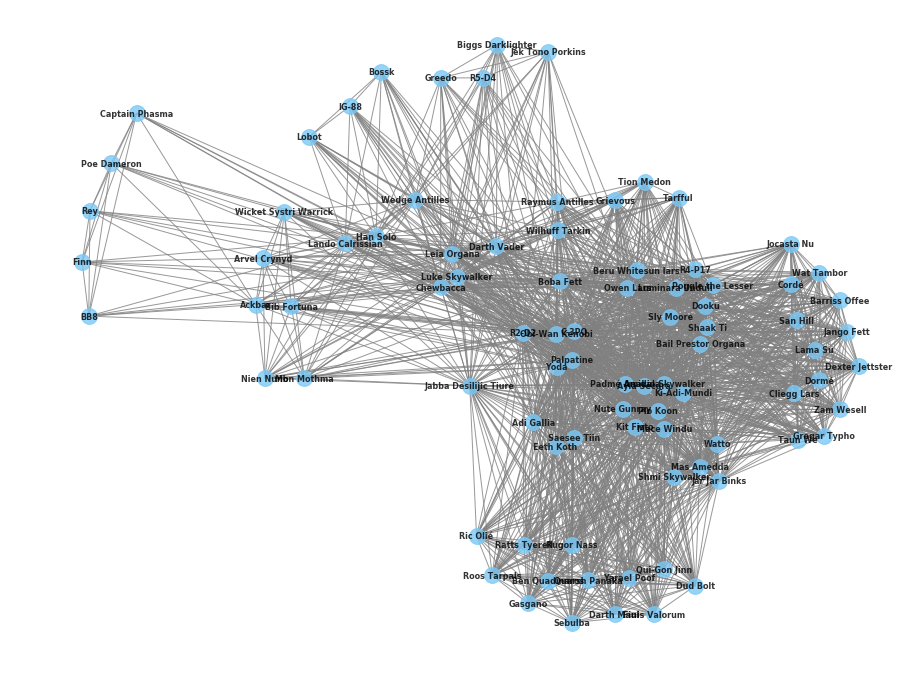

In [75]:
# initiate graph
G=nx.Graph()
G.add_nodes_from(swPeople)
G.add_weighted_edges_from(edgeTuples)
plt.figure(figsize=(12,9)) 
nx.draw(G, with_labels=True, font_size = 8, node_size = 250,\
        font_weight = 'bold', alpha = 0.8, node_color='xkcd:lightblue', edge_color='gray',pos=nx.spring_layout(G))


The first thing I notice is that the stars of the somewhat recent movie, *The Force Awakens*, appear to have relatively weak connections compared to the other characters.  See, for example, Poe Dameron, Rey, Fin, BB8, etc.  This gels with our intuition, as these characters were brand new to the Star Wars universe in this movie.

I also see many minor characters on the outskirts of our graph.  Examples include Biggs Darklighter, an X-wing pilot that only appear in *Episode IV: A New Hope* and Sebulba, a pod racer that made an appearance in *Episode 1: The Phantom Menace.*  These characters each have a below average number of edges.  

Jar Jar Binks appears to have a higher degree than many other minor characters.  He appeared in all three of the Star Wars prequels--much to the chagrin of the average Star Wars Fan.  

Finally, I see the usual suspects in the center of the graph with a large number of edges: Luke Skywalker, R2-D2, Darth Vader, C3PO, Chewbacca, etc.

## Graph Analysis

Below are some high-level graph metrics:
    

In [129]:
# number of edges
print("number of edges: " + str(G.number_of_edges()))

# number of nodes
print("\nnumber of nodes: " + str(G.number_of_nodes()))

# graph diameter
print("\ngraph diameter: " + str(nx.diameter(G)))

# degree statistics
deg = nx.degree(G, weight='weight')
deg_vals = [b for a,b in deg]

print("\nminimum weighted graph degree: " + str(min(deg_vals)))

print("\nmaximum weighted graph degree: " + str(max(deg_vals)))

# top 10 nodes in terms of degree
print("Top 10 Weighted Degrees:")
print(sorted([(x,y) for x,y in deg], key=lambda z: z[1], reverse=True)[0:10])

print("\nBottom 10 Weighted Degrees:")
print(sorted([(x,y) for x,y in deg], key=lambda z: z[1])[0:10])

number of edges: 1793

number of nodes: 87

graph diameter: 2

minimum weighted graph degree: 10

maximum weighted graph degree: 166
Top 10 Weighted Degrees:
[('R2-D2', 166), ('C-3PO', 156), ('Obi-Wan Kenobi', 156), ('Yoda', 139), ('Palpatine', 139), ('Anakin Skywalker', 105), ('Nute Gunray', 105), ('Ayla Secura', 105), ('Mace Windu', 105), ('Ki-Adi-Mundi', 105)]

Bottom 10 Weighted Degrees:
[('Finn', 10), ('Rey', 10), ('Poe Dameron', 10), ('BB8', 10), ('Captain Phasma', 10), ('IG-88', 15), ('Bossk', 15), ('Lobot', 15), ('R5-D4', 17), ('Biggs Darklighter', 17)]


The graph has a very small graph diameter.  That is not terribly surprising.  Our graph is connected, with a theoretical upper bound on path distance of six between any two nodes.  

The top 10 characters by weighted degree comprise many very well-known characters.  I am somewhat surprised by the last four characters in the top 10 list.  These characters appear only in the three prequels.  Perhaps the prequels have a higher number of major characters compared to the other movies in the series.  Let's check: 

In [127]:
# count number of major characters in each film
for k,v in swFilmChars.items():
    print(k,":", len(v))

A New Hope : 18
Attack of the Clones : 40
The Phantom Menace : 34
Revenge of the Sith : 34
Return of the Jedi : 20
The Empire Strikes Back : 16
The Force Awakens : 11


In fact, the prequels all feature between 30-40 major characters, compared to other movies in the series with only 10-20 characters.

The API did not have a character gender as a category.  We added it here manually, using the Star Wars databank webpage--see details in the Resources section.

In [130]:
swGender = ['m','d','d','m','f','m','f','d','m','m','m','m','m','m','m','m','m','m','m','m','m','d','m','m','m','m','f','m',\
 'm','m','m','m','m','m','m','m','m','m','m','m','f','m','m','f','m','m','m','m','m','m','m','f','m','m','m','m',\
 'm','f','m','m','f','f','f','m','m','m','f','m','m','f','f','m','d','m','m','f','m','m','m','f','m','m','f','m',\
 'd','f','f']


Now, let's load node attributes to our graph.

In [131]:
# create dictionaries: keys = character, value = node attribute
speciesDict = dict()
for i in range(len(swPeople)):
    speciesDict[swPeople[i]] = swSpecies[i]

homeworldDict = dict()
for i in range(len(swPeople)):
    homeworldDict[swPeople[i]] = swHomeworld[i]    
    
filmsDict = dict()
for i in range(len(swPeople)):
    filmsDict[swPeople[i]] = swFilms[i] 
    
genderDict = dict()
for i in range(len(swPeople)):
    genderDict[swPeople[i]] = swGender[i] 
    

# set node attributes
nx.set_node_attributes(G, name='species', values=speciesDict)
nx.set_node_attributes(G, name='homeworld', values=homeworldDict)
nx.set_node_attributes(G, name='films', values=filmsDict)
nx.set_node_attributes(G, name='gender', values=genderDict)



## Degree Centrality and Eigenvector Centrality

**Centrality Measures per Node**

Per the homework instructions, I need to calculate the degree centrality and eigenvector centrality measures for each node.  

Below are the degree centrality measures.  
*Note: the nx.degree_centrality() function does not provide an option to calculate a weighted degree centrality meeasure*.

In [138]:
# degree centralities sorted
sorted(nx.degree_centrality(G).items(), key=lambda x: x[1], reverse=True)

[('R2-D2', 1.0),
 ('C-3PO', 0.9418604651162791),
 ('Obi-Wan Kenobi', 0.9418604651162791),
 ('Yoda', 0.8953488372093024),
 ('Palpatine', 0.8953488372093024),
 ('Anakin Skywalker', 0.7558139534883721),
 ('Nute Gunray', 0.7558139534883721),
 ('Ayla Secura', 0.7558139534883721),
 ('Mace Windu', 0.7558139534883721),
 ('Ki-Adi-Mundi', 0.7558139534883721),
 ('Kit Fisto', 0.7558139534883721),
 ('Plo Koon', 0.7558139534883721),
 ('Padmé Amidala', 0.7558139534883721),
 ('Owen Lars', 0.6744186046511628),
 ('Beru Whitesun lars', 0.6744186046511628),
 ('Luke Skywalker', 0.6511627906976745),
 ('Leia Organa', 0.6511627906976745),
 ('Chewbacca', 0.6511627906976745),
 ('Boba Fett', 0.6511627906976745),
 ('Jar Jar Binks', 0.6511627906976745),
 ('Watto', 0.6511627906976745),
 ('Shmi Skywalker', 0.6511627906976745),
 ('Mas Amedda', 0.6511627906976745),
 ('Jabba Desilijic Tiure', 0.6395348837209303),
 ('Darth Vader', 0.5930232558139534),
 ('Eeth Koth', 0.5930232558139534),
 ('Adi Gallia', 0.593023255813953

The values are fairly consistent with our top 10 and bottom 10 weighted degree lists produced earlier.  
  
Below are the eigenvector centrality measures:

In [140]:
sorted(nx.eigenvector_centrality(G, max_iter=100, tol=1e-06, nstart=None,weight='weight').items(),key=lambda x: x[1], reverse=True)

[('R2-D2', 0.25099215432105276),
 ('C-3PO', 0.24362311988568675),
 ('Obi-Wan Kenobi', 0.24362311988568675),
 ('Yoda', 0.22080322677579242),
 ('Palpatine', 0.22080322677579242),
 ('Padmé Amidala', 0.17063051865797454),
 ('Anakin Skywalker', 0.17063051865797452),
 ('Nute Gunray', 0.17063051865797452),
 ('Ayla Secura', 0.17063051865797452),
 ('Mace Windu', 0.17063051865797452),
 ('Ki-Adi-Mundi', 0.17063051865797452),
 ('Kit Fisto', 0.17063051865797452),
 ('Plo Koon', 0.17063051865797452),
 ('Luke Skywalker', 0.14893315281332722),
 ('Leia Organa', 0.14893315281332722),
 ('Chewbacca', 0.14893315281332722),
 ('Owen Lars', 0.14765350630451657),
 ('Beru Whitesun lars', 0.14765350630451657),
 ('Darth Vader', 0.14017201141911526),
 ('Poggle the Lesser', 0.12282587637592961),
 ('Luminara Unduli', 0.12282587637592961),
 ('Dooku', 0.12282587637592961),
 ('Bail Prestor Organa', 0.12282587637592961),
 ('R4-P17', 0.12282587637592961),
 ('Shaak Ti', 0.12282587637592961),
 ('Sly Moore', 0.12282587637592

Interestingly, the top ranked nodes in terms of eigenvector centrality are almost identical to top ranked nodes based on degree centrality.

**Centrality Measures per Category**

Let's see if there are statistically significant differences in average degree and eigenvector centralities by gender.  
*Note: in this dataset, there are three genders:  'm','f', and 'd'.  The 'd' refers to 'droid'*

In [147]:
# save degree and eigen centrality measures for all nodes
deg_centr = nx.degree_centrality(G)
eigen_centr = nx.eigenvector_centrality(G, max_iter=100, tol=1e-06, nstart=None,weight='weight')


# degree centrality by gender
genderDC = dict()

for i in np.unique(swGender):
    genderDC[i] = [v for k,v in deg_centr.items() if k in [x for x,y in G.nodes(data=True) if y['gender']==i] ]
    print(i," degree centrality: ",statistics.mean(genderDC[i]))
    
print('\nF-test degree centrality:')
print('\n',stats.f_oneway(*[genderDC[i] for i in np.unique(swGender)]),'\n' )

# eigenvector centrality by gender
genderEC = dict()
for i in np.unique(swGender):
    genderEC[i] = [v for k,v in eigen_centr.items() if k in [x for x,y in G.nodes(data=True) if y['gender']==i] ]
    print(i," eigenvector centrality: ",statistics.mean(genderEC[i]))
   
print('\nF-test eigenvector centrality:')
print('\n',stats.f_oneway(*[genderEC[i] for i in np.unique(swGender)]),'\n' )


d  degree centrality:  0.5038759689922481
f  degree centrality:  0.501937984496124
m  degree centrality:  0.47046880767811

F-test degree centrality:

 F_onewayResult(statistic=0.1876313540961098, pvalue=0.8292666816795955) 

d  eigenvector centrality:  0.11374208144552654
f  eigenvector centrality:  0.0920756633521012
m  eigenvector centrality:  0.08639499634928641

F-test eigenvector centrality:

 F_onewayResult(statistic=0.5963013586690267, pvalue=0.5531600137322508) 



The mean values appear to be close across gender categories.  Using an F-test with a 5% level of significance, we fail to reject the null hypothesis that the centrality measures are equal across categories.  It's important to note that there are many more male characters compared to females and droids.  See barplot below. 

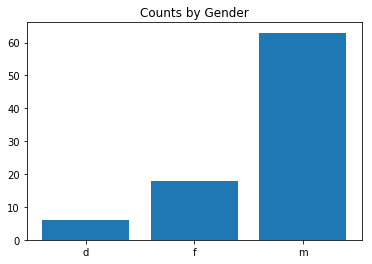

In [150]:
# Make a barplots for gender:
height = [len(genderDC[i]) for i in genderDC.keys()]
bars = [i for i in np.unique(swGender)]
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)

plt.title('Counts by Gender')

# Show graphic
plt.show()


In [ ]:
Let's perform a similar analysis by species:

In [154]:
# degree centrality by species
speciesDC = dict()

for i in np.unique(swSpecies):
    speciesDC[i] = [v for k,v in deg_centr.items() if k in [x for x,y in G.nodes(data=True) if y['species']==i] ]
    print(i," degree centrality: ",round(statistics.mean(speciesDC[i]),3))
    
print('\nF-test degree centrality:')
print('\n',stats.f_oneway(*[speciesDC[i] for i in np.unique(swSpecies)]),'\n' )

# eigenvector centrality by species
speciesEC = dict()
for i in np.unique(swSpecies):
    speciesEC[i] = [v for k,v in eigen_centr.items() if k in [x for x,y in G.nodes(data=True) if y['species']==i] ]
    print(i," eigenvector centrality: ",round(statistics.mean(speciesEC[i]),3))
    
print('\nF-test eigenvector centrality:')
print('\n',stats.f_oneway(*[speciesEC[i] for i in np.unique(swSpecies)]),'\n' )



Aleena  degree centrality:  0.384
Besalisk  degree centrality:  0.453
Cerean  degree centrality:  0.756
Chagrian  degree centrality:  0.651
Clawdite  degree centrality:  0.453
Droid  degree centrality:  0.486
Dug  degree centrality:  0.384
Ewok  degree centrality:  0.221
Geonosian  degree centrality:  0.593
Gungan  degree centrality:  0.473
Human  degree centrality:  0.475
Hutt  degree centrality:  0.64
Iktotchi  degree centrality:  0.593
Kaleesh  degree centrality:  0.384
Kaminoan  degree centrality:  0.453
Kel Dor  degree centrality:  0.756
Mirialan  degree centrality:  0.523
Mon Calamari  degree centrality:  0.279
Muun  degree centrality:  0.453
Nautolan  degree centrality:  0.756
Neimodian  degree centrality:  0.756
Pau  degree centrality:  0.384
Quermian  degree centrality:  0.384
Rodian  degree centrality:  0.198
Skakoan  degree centrality:  0.453
Sullustan  degree centrality:  0.221
Tholothian  degree centrality:  0.593
Togruta  degree centrality:  0.593
Toong  degree centrality

We see variation in the centrality measures across species.  Unfortunately, we do not get a statistically significant result.  This is probably related to the fact that most characters are humans.  We have very small sample sizes for other species--refer to the chart below.

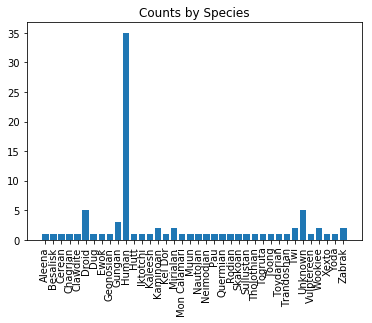

In [156]:
# Make a barplots for species:
height = [len(speciesDC[i]) for i in speciesDC.keys()]
bars = [i for i in np.unique(swSpecies)]
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)

plt.title('Counts by Species')
plt.xticks(rotation=90)

# Show graphic
plt.show()

Finally, let's perform the same type of categorical analysis by homeworld:

In [159]:
# degree centrality by homeworld
homeworldDC = dict()

for i in np.unique(swHomeworld):
    homeworldDC[i] = [v for k,v in deg_centr.items() if k in [x for x,y in G.nodes(data=True) if y['homeworld']==i] ]
    print(i," degree centrality: ",round(statistics.mean(homeworldDC[i]),3))
    
print('\nF-test degree centrality:')
print('\n',stats.f_oneway(*[homeworldDC[i] for i in np.unique(swHomeworld)]),'\n' )

# eigenvector centrality by homeworld
homeworldEC = dict()
for i in np.unique(swHomeworld):
    homeworldEC[i] = [v for k,v in eigen_centr.items() if k in [x for x,y in G.nodes(data=True) if y['homeworld']==i] ]
    print(i," eigenvector centrality: ",round(statistics.mean(homeworldEC[i]),3))
    
print('\nF-test eigenvector centrality:')
print('\n',stats.f_oneway(*[homeworldEC[i] for i in np.unique(swHomeworld)]),'\n' )



Alderaan  degree centrality:  0.57
Aleen Minor  degree centrality:  0.384
Bespin  degree centrality:  0.174
Bestine IV  degree centrality:  0.198
Cato Neimoidia  degree centrality:  0.756
Cerea  degree centrality:  0.756
Champala  degree centrality:  0.651
Chandrila  degree centrality:  0.221
Concord Dawn  degree centrality:  0.453
Corellia  degree centrality:  0.378
Coruscant  degree centrality:  0.477
Dathomir  degree centrality:  0.384
Dorin  degree centrality:  0.756
Endor  degree centrality:  0.221
Eriadu  degree centrality:  0.465
Geonosis  degree centrality:  0.593
Glee Anselm  degree centrality:  0.756
Haruun Kal  degree centrality:  0.756
Iktotch  degree centrality:  0.593
Iridonia  degree centrality:  0.593
Kalee  degree centrality:  0.384
Kamino  degree centrality:  0.519
Kashyyyk  degree centrality:  0.517
Malastare  degree centrality:  0.384
Mirial  degree centrality:  0.523
Mon Cala  degree centrality:  0.279
Muunilinst  degree centrality:  0.453
Naboo  degree centrality:

Once again, we see variation in centrality measures by homeworld, but the results do not appear to be statistically significant.  In the graph below, we see that the plurality the characters are from Naboo, Tatooine, or from an unknown origin.

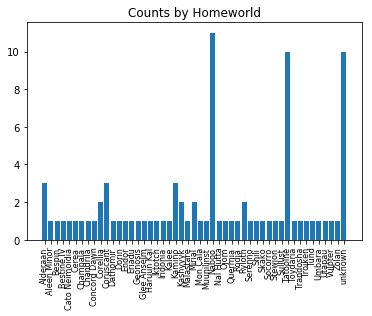

In [161]:
# Make a barplots by homeworld:
height = [len(homeworldDC[i]) for i in homeworldDC.keys()]
bars = [i for i in np.unique(swHomeworld)]
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)

plt.title('Counts by Homeworld')
plt.xticks(rotation=90, size=8)
# Show graphic
plt.show()


## Video Commentary

http://youtu.be/5tuKRaJFC_0?hd=1

## References

* Star Wars API: https://swapi.co/
* Visual Studio C++ Build Tools download links: https://www.scivision.co/python-windows-visual-c++-14-required/
* swapi-python documentation:https://swapi-python.readthedocs.io/en/latest/index.html
* swapi-python Github page: https://github.com/phalt/swapi-python
* Star Wars databank: https://www.starwars.com/databank

